#  Loading the dataset and some analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 5110 entries, 0 to 5109

Data columns (total 12 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   id                 5110 non-null   int64  

 1   gender             5110 non-null   object 

 2   age                5110 non-null   float64

 3   hypertension       5110 non-null   int64  

 4   heart_disease      5110 non-null   int64  

 5   ever_married       5110 non-null   object 

 6   work_type          5110 non-null   object 

 7   Residence_type     5110 non-null   object 

 8   avg_glucose_level  5110 non-null   float64

 9   bmi                4909 non-null   float64

 10  smoking_status     5110 non-null   object 

 11  stroke             5110 non-null   int64  

dtypes: float64(3), int64(4), object(5)

memory usage: 479.2+ KB


In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Wrangling

In [7]:
data.isnull().mean()*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [8]:
skewness = data['bmi'].skew()
skewness

1.0553402052962912

In [9]:
data['bmi'].fillna(data['bmi'].median(),inplace = True)


C:\Users\natha\AppData\Local\Temp\ipykernel_20068\3274980947.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





  data['bmi'].fillna(data['bmi'].median(),inplace = True)


In [10]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
data.drop(columns=['id'],inplace = True)
data.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1


In [12]:
data.duplicated().sum()

0

# Data Visualization

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

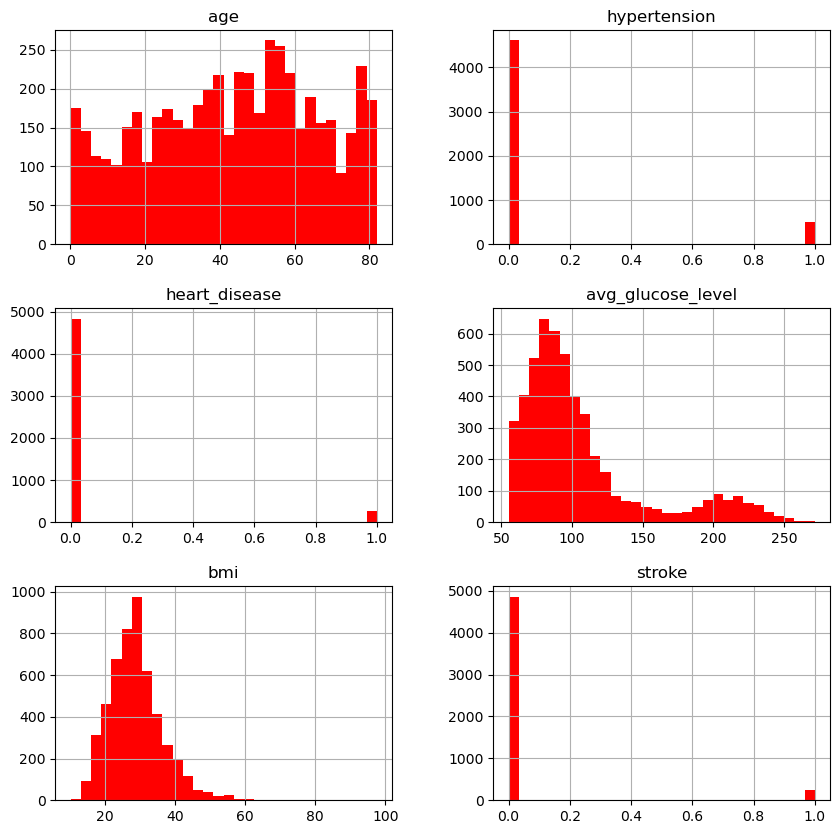

In [14]:
data.hist(bins = 30, figsize = (10,10), color = 'r')

In [15]:
data['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

C:\Users\natha\AppData\Local\Temp\ipykernel_20068\3346106728.py:7: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.countplot(x=data['work_type'],palette = 'viridis')

C:\Users\natha\AppData\Local\Temp\ipykernel_20068\3346106728.py:10: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.countplot(x=data['Residence_type'],palette = 'bright')

C:\Users\natha\AppData\Local\Temp\ipykernel_20068\3346106728.py:13: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.countplot(x=data['smoking_status'],palette = 'pastel')


Text(0.5, 1.0, 'smoking_status')

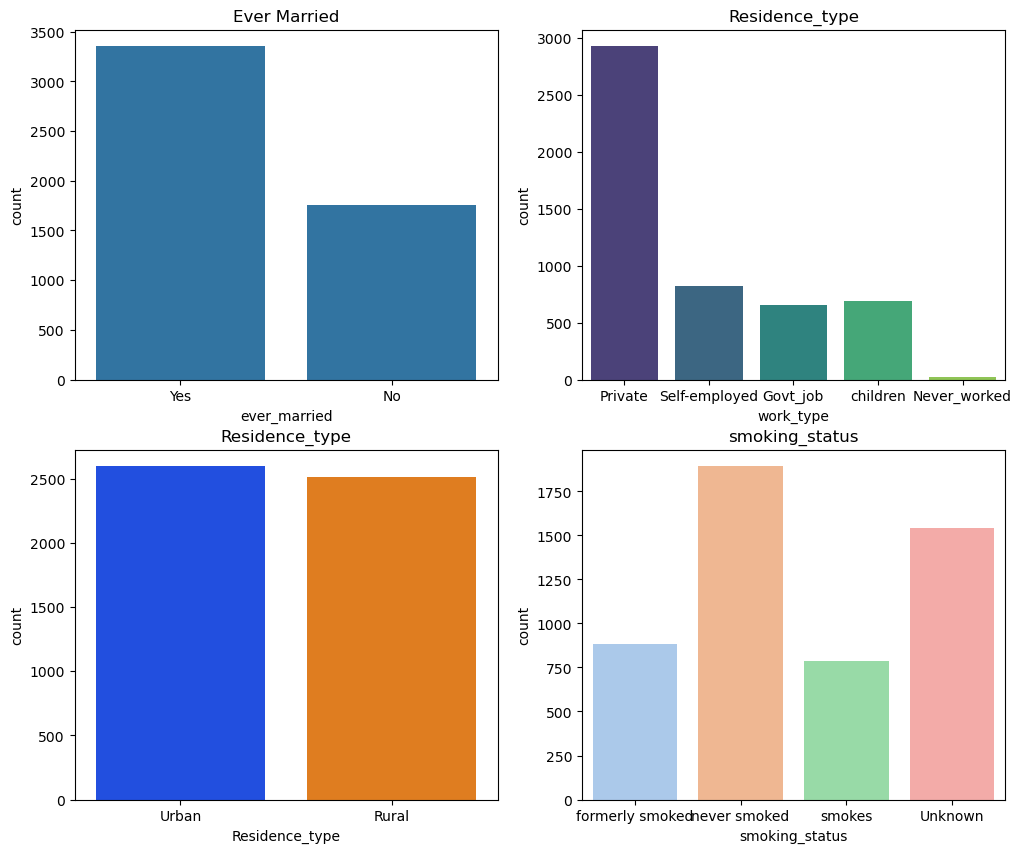

In [16]:
plt.figure(figsize=(12, 10))
# First subplot
plt.subplot(2, 2, 1)
sns.countplot(x=data['ever_married'])
plt.title('Ever Married')
plt.subplot(2,2,2)
sns.countplot(x=data['work_type'],palette = 'viridis')
plt.title('Residence_type')
plt.subplot(2,2,3)
sns.countplot(x=data['Residence_type'],palette = 'bright')
plt.title('Residence_type')
plt.subplot(2,2,4)
sns.countplot(x=data['smoking_status'],palette = 'pastel')
plt.title('smoking_status')

C:\Users\natha\AppData\Local\Temp\ipykernel_20068\4172377618.py:2: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.boxplot(x='stroke', y='age', data=data, palette='Set2')


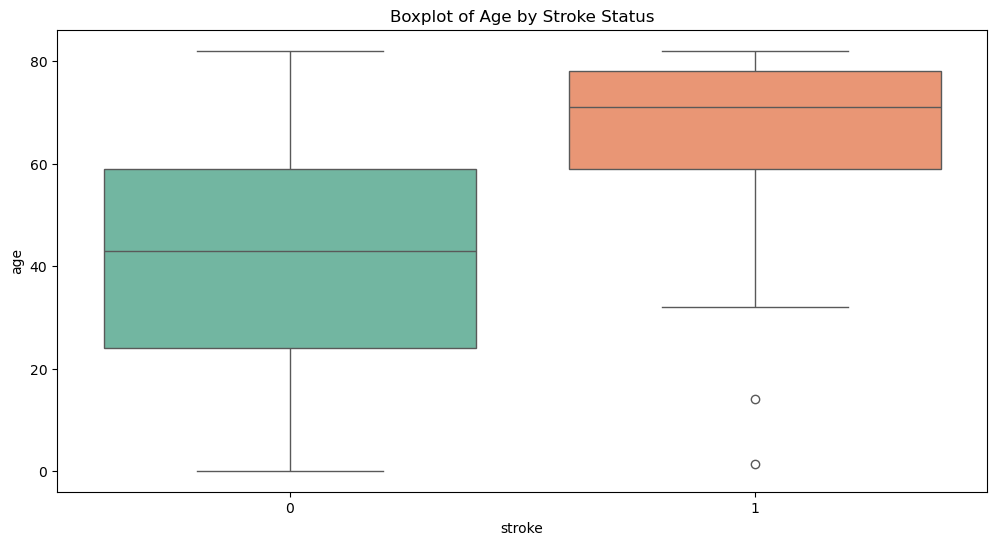

C:\Users\natha\AppData\Local\Temp\ipykernel_20068\4172377618.py:7: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.boxplot(x='stroke', y='avg_glucose_level', data=data, palette='Set2')


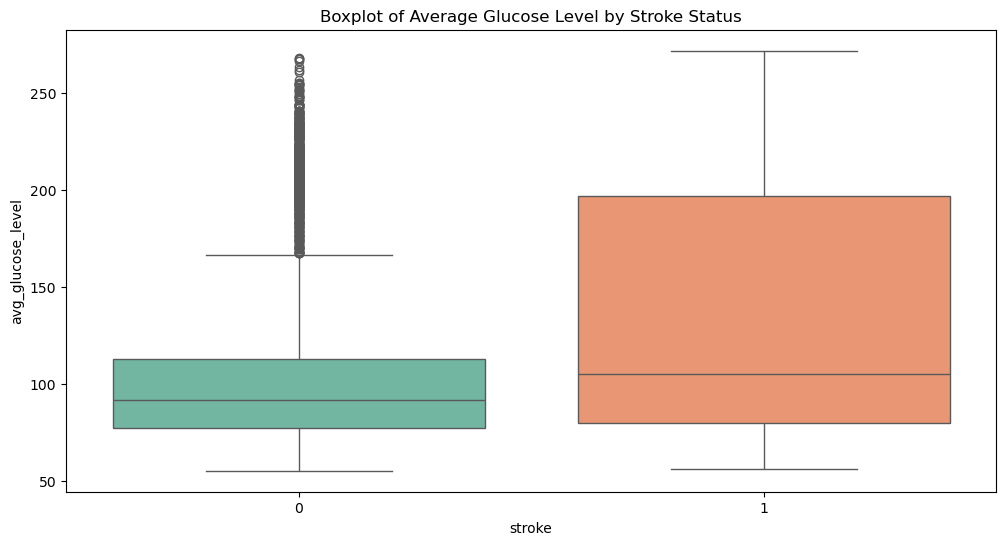

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='stroke', y='age', data=data, palette='Set2')
plt.title('Boxplot of Age by Stroke Status')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=data, palette='Set2')
plt.title('Boxplot of Average Glucose Level by Stroke Status')
plt.show()



C:\Users\natha\AppData\Local\Temp\ipykernel_20068\313558298.py:2: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.violinplot(x='stroke', y='bmi', data=data, palette='cool')


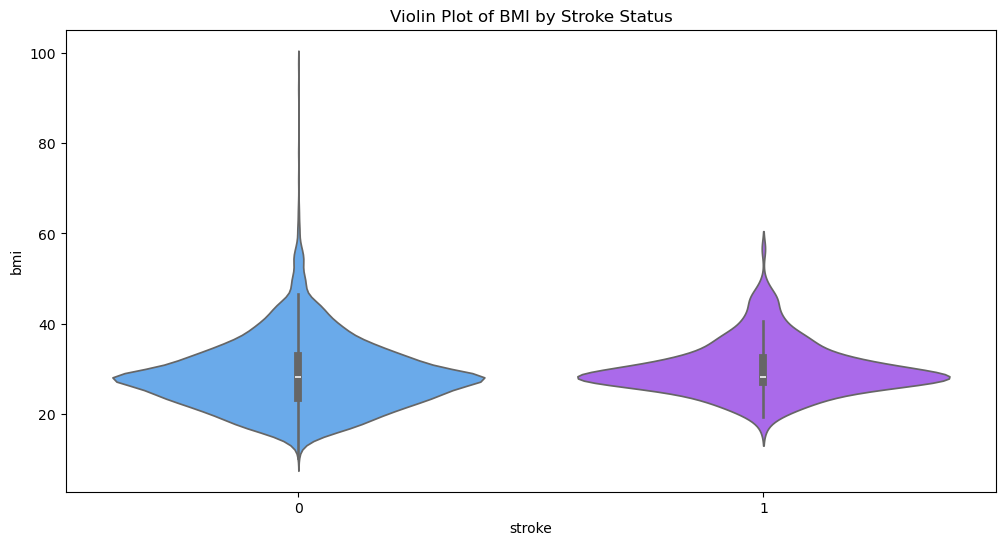

In [18]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='stroke', y='bmi', data=data, palette='cool')
plt.title('Violin Plot of BMI by Stroke Status')
plt.show()


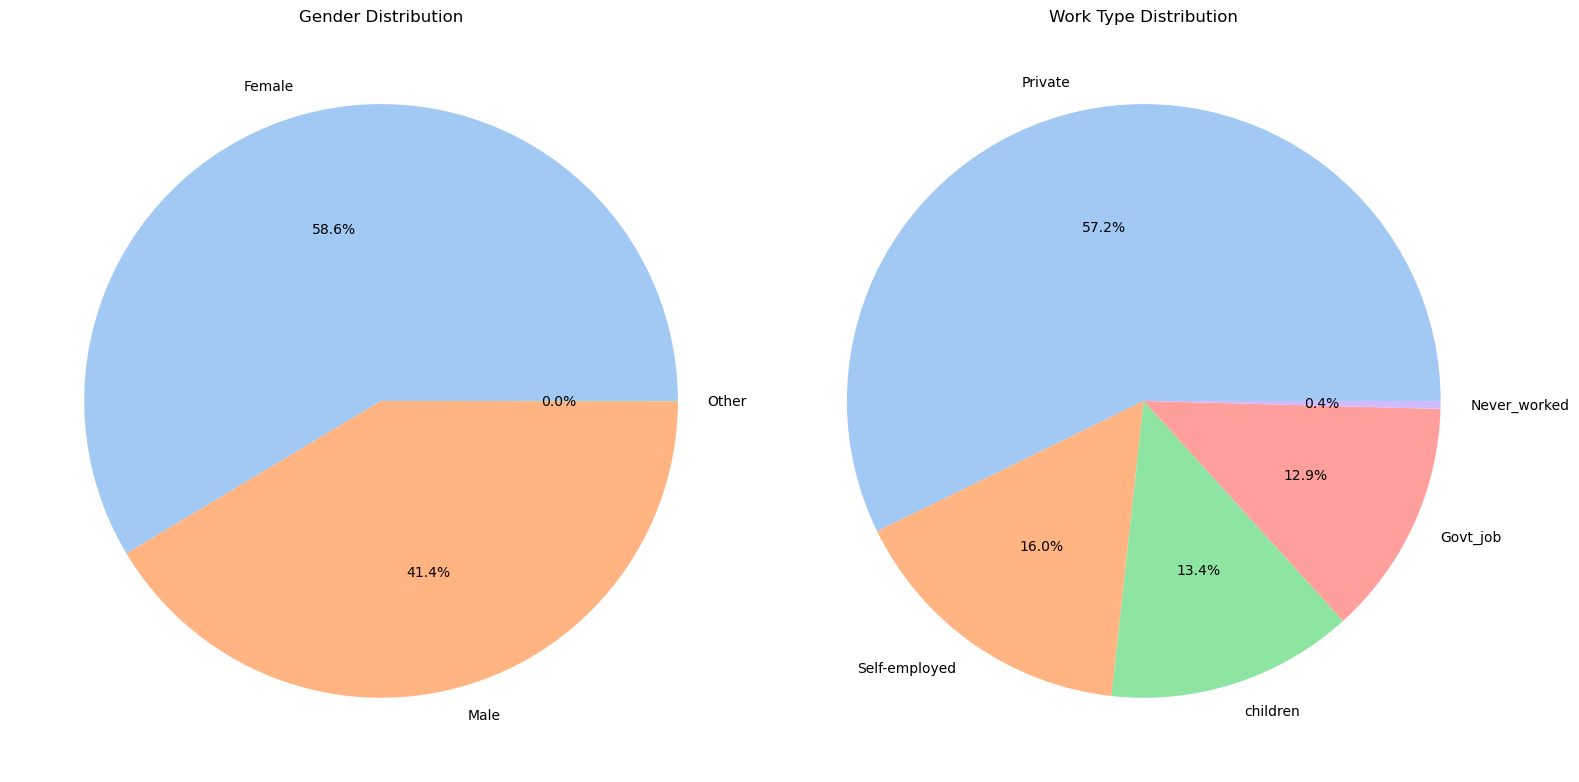

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
data['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Gender Distribution')
plt.ylabel('')
plt.subplot(1, 2, 2)
data['work_type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Work Type Distribution')
plt.ylabel('')  # Remove the y-label
plt.tight_layout()
plt.show()

In [20]:
numerical_cols = data.select_dtypes(exclude=['object']).columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(numerical_cols)
print(categorical_cols)                              

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',

       'stroke'],

      dtype='object')

Index(['gender', 'ever_married', 'work_type', 'Residence_type',

       'smoking_status'],

      dtype='object')


In [21]:
data[numerical_cols].corr()['stroke']

age                  0.245257
hypertension         0.127904
heart_disease        0.134914
avg_glucose_level    0.131945
bmi                  0.036110
stroke               1.000000
Name: stroke, dtype: float64

<Axes: >

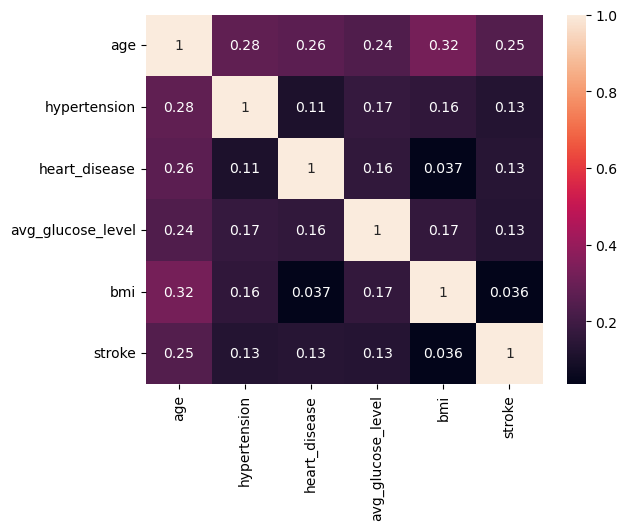

In [22]:
sns.heatmap(data[numerical_cols].corr(),annot=True)

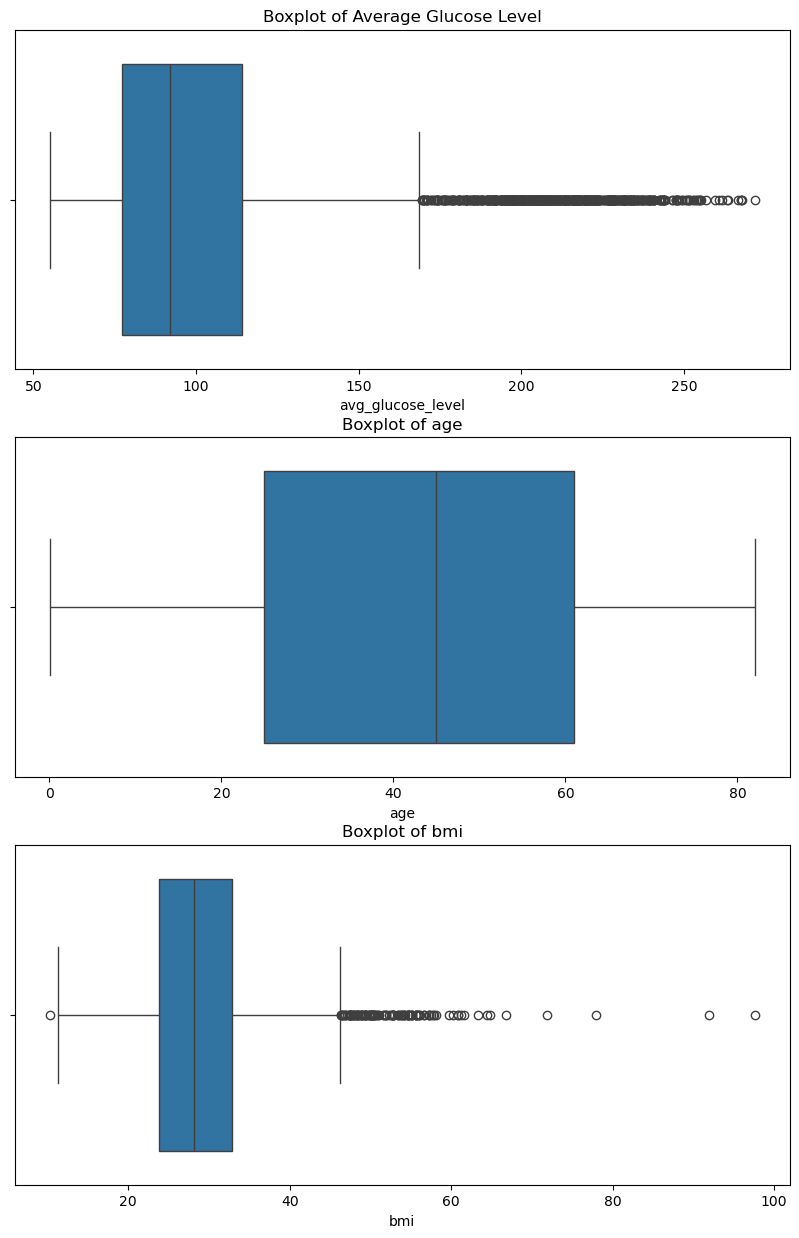

In [23]:
plt.figure(figsize=(10, 15))
plt.subplot(3,1,1)
sns.boxplot(x=data['avg_glucose_level'])
plt.title('Boxplot of Average Glucose Level')
plt.subplot(3,1,2)
sns.boxplot(x=data['age'])
plt.title('Boxplot of age')
plt.subplot(3,1,3)
sns.boxplot(x=data['bmi'])
plt.title('Boxplot of bmi')
plt.show()


#age,glucose,bmi

# Splitting the model into train and test and k fold cross validation

In [25]:
categorical_data = data[categorical_cols]
categorical_data

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Assume 'data' is your DataFrame and 'categorical_cols' contains the names of categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='stroke'), data['stroke'], test_size=0.2, random_state=42)

# Create the ColumnTransformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep the rest of the columns
)

# Fit the preprocessor on the training data and transform both the train and test sets
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Convert the transformed data to a DataFrame if necessary
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=preprocessor.get_feature_names_out())
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=preprocessor.get_feature_names_out())

# Check the number of columns
print("Training set shape:", X_train_encoded_df.shape)
print("Test set shape:", X_test_encoded_df.shape)


Training set shape: (4088, 20)

Test set shape: (1022, 20)


In [34]:
X_train_encoded_df

,cat__gender_Female,cat__gender_Male,cat__ever_married_No,cat__ever_married_Yes,cat__work_type_Govt_job,cat__work_type_Never_worked,cat__work_type_Private,cat__work_type_Self-employed,cat__work_type_children,cat__Residence_type_Rural,cat__Residence_type_Urban,cat__smoking_status_Unknown,cat__smoking_status_formerly smoked,cat__smoking_status_never smoked,cat__smoking_status_smokes,remainder__age,remainder__hypertension,remainder__heart_disease,remainder__avg_glucose_level,remainder__bmi
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,79.00,0.0,0.0,112.64,28.5
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,62.00,0.0,0.0,88.32,36.3
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,21.00,0.0,0.0,59.52,33.7
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,31.00,0.0,0.0,65.70,30.4
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,31.00,0.0,0.0,59.63,19.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,43.00,0.0,0.0,88.00,30.6
4084,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61.00,1.0,0.0,170.05,60.2
4085,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.16,0.0,0.0,97.28,17.8
4086,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,80.00,0.0,0.0,196.08,31.0


In [36]:
X_test_encoded_df

,cat__gender_Female,cat__gender_Male,cat__ever_married_No,cat__ever_married_Yes,cat__work_type_Govt_job,cat__work_type_Never_worked,cat__work_type_Private,cat__work_type_Self-employed,cat__work_type_children,cat__Residence_type_Rural,cat__Residence_type_Urban,cat__smoking_status_Unknown,cat__smoking_status_formerly smoked,cat__smoking_status_never smoked,cat__smoking_status_smokes,remainder__age,remainder__hypertension,remainder__heart_disease,remainder__avg_glucose_level,remainder__bmi
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,31.00,0.0,0.0,64.85,23.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,40.00,0.0,0.0,65.29,28.3
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,8.00,0.0,0.0,74.42,22.5
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.00,1.0,0.0,76.64,19.5
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,75.00,0.0,0.0,94.77,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.88,0.0,0.0,143.97,28.1
1018,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.32,0.0,0.0,107.02,28.1
1019,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,49.00,1.0,0.0,119.30,30.4
1020,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,56.00,0.0,0.0,128.63,24.9


# K fold cross validation

In [38]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning occurs

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X_train_encoded_df, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")


Cross-validation scores: [0.95476773 0.95354523 0.95354523 0.95471236 0.95471236]

Mean CV Accuracy: 0.9542565830622498

Standard Deviation of CV Accuracy: 0.0005811672023196902


# Applying SMOTE for balancing the dataset

In [40]:

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded_df, y_train)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model on the resampled data
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = log_reg.predict(X_test_encoded_df)

# Evaluate the model

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:

[[721 239]

 [ 15  47]]



Classification Report:

              precision    recall  f1-score   support



           0       0.98      0.75      0.85       960

           1       0.16      0.76      0.27        62



    accuracy                           0.75      1022

   macro avg       0.57      0.75      0.56      1022

weighted avg       0.93      0.75      0.82      1022




C:\Users\natha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


# Applying Random forrest classifier and decision tree classifier

In [44]:
# Predict on the test set
from sklearn.metrics import accuracy_score
y_pred = log_reg.predict(X_test_encoded_df)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Set Accuracy: {accuracy}")

Test Set Accuracy: 0.7514677103718199


In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled) 
y_pred = rf.predict(X_test_encoded_df)
# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")

Test Set Accuracy: 0.9393346379647749


In [48]:
from sklearn.tree import DecisionTreeClassifier
dct =  DecisionTreeClassifier()
dct.fit(X_train_resampled, y_train_resampled)
y_pred = dct.predict(X_test_encoded_df)
# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")

Test Set Accuracy: 0.9070450097847358


# Conclusion
Random forrest classifier happens to have the highest acccuracy of all the 3 ML algorithms. 